## TIME SERIES ANALYSIS ON CORONAVIRUS FOR THE NETHERLANDS THROUGH DAILY UPDATED DATASET (Latest Version)

*This notebook is scraping yesterday's dataset from ECDC website.

In [8]:
import pandas as pd
import requests
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#This part is for update the dataset.


yesterday = date.today() - timedelta(days=1)
yesterday1 = yesterday.strftime('%Y-%m-%d')


url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday1}.xlsx'
df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  


df.columns = ['Day','Month','Year','Cases','Deaths','Countries and territories','Geold','Country_Code','Population']


df.drop('Day',1,inplace=True)
df.drop('Month',1,inplace=True)
df.drop('Year',1,inplace=True)
df.drop('Countries and territories',1,inplace=True)
df.drop('Country_Code',1,inplace=True)
df.drop('Population',1,inplace=True)
df_NL = df[df['Geold'] == 'NL']
df_NL.drop('Geold',1,inplace=True)
df_NL.drop(df_NL.tail(1).index,inplace=True) # drop last row 31-12-2019



df_NL.head(10)


C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cases,Deaths
DateRep,,
2020-03-26,852,80
2020-03-25,811,63
2020-03-24,545,34
2020-03-23,573,43
2020-03-22,637,30
2020-03-21,534,30
2020-03-20,409,18
2020-03-19,346,34
2020-03-18,292,0


In [10]:
df_NL.tail(10)

,Cases,Deaths
DateRep,,
2020-01-10,0,0
2020-01-09,0,0
2020-01-08,0,0
2020-01-07,0,0
2020-01-06,0,0
2020-01-05,0,0
2020-01-04,0,0
2020-01-03,0,0
2020-01-02,0,0


In [11]:
type(df.index[0]) #Checking the dates whether they are timestamp or not.

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
df_NL.shape

(86, 2)

In [13]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86 entries, 2020-03-26 to 2020-01-01
Data columns (total 2 columns):
Cases     86 non-null int64
Deaths    86 non-null int64
dtypes: int64(2)
memory usage: 2.0 KB


In [14]:
df_NL.isnull().sum()

Cases     0
Deaths    0
dtype: int64

In [15]:
df_NL.describe()

,Cases,Deaths
count,86.000000,86.000000
mean,74.558140,4.139535
std,181.826395,13.423564
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,10.000000,0.000000
max,852.000000,80.000000


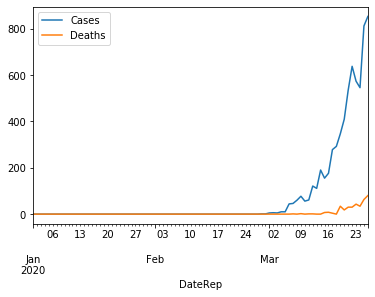

In [16]:
df_NL.resample('D').mean().plot()

356


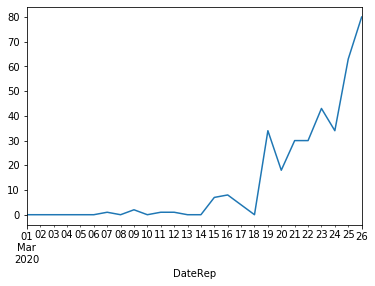

In [17]:
print(df_NL['Deaths'].sum())
df_NL.Deaths['2020-03'].resample('D').mean().plot()

Cases     6410
Deaths     356
dtype: int64


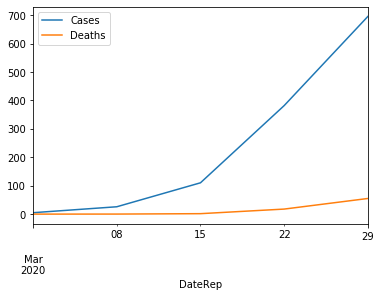

In [18]:
print(df_NL['2020-03'].sum())

df_NL['2020-03'].resample('W').mean().plot()

Cases     6410
Deaths     356
dtype: int64


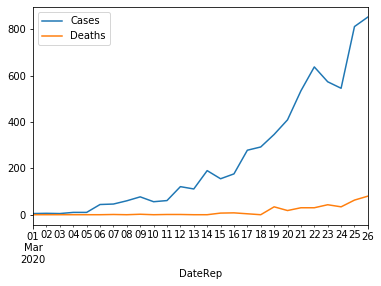

In [19]:
print(df_NL['2020-03'].sum())
df_NL['2020-03'].resample('D').mean().plot()